# Decision trees
Application in a classification problem with data referring to morphologies and other characteristics of clinical relevance in the diagnosis of breast cancer.

## Project description

In [ ]:
# This dataset is integrated into the Scikit-learn sample dataset 
# References: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# The DESCR method allows us to access a docstring with information about the dataset
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Scanning and preprocessing

In [ ]:
# As always, our first task is to review the data and apply some
# imputation methods

# We load the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We create a Pandas dataframe from the data dictionary
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Let's check that this set does not contain missing values
mvs = df.isnull().sum() 
print("Number of missing values ​​per variable:\n",  mvs)

Number of missing values ​​per variable:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [ ]:
# The aim of the project is to obtain good precision by classifying
# the examples in the test set in the two categories that express
# if the tumor is malignant or benign
print("Classes:", data.target_names)

Classes: ['malignant' 'benign']


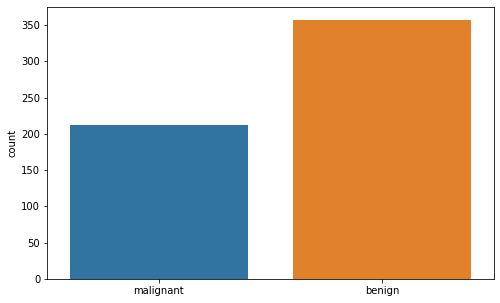

In [ ]:

# We separate the data sets into characteristics and objective variable
X, y = data.data, data.target

# Let's see in a graph how many instances we have of each class
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111)
sns.countplot(x=data.target, ax=ax)
ax.set_xticklabels(data.target_names)  
plt.show()

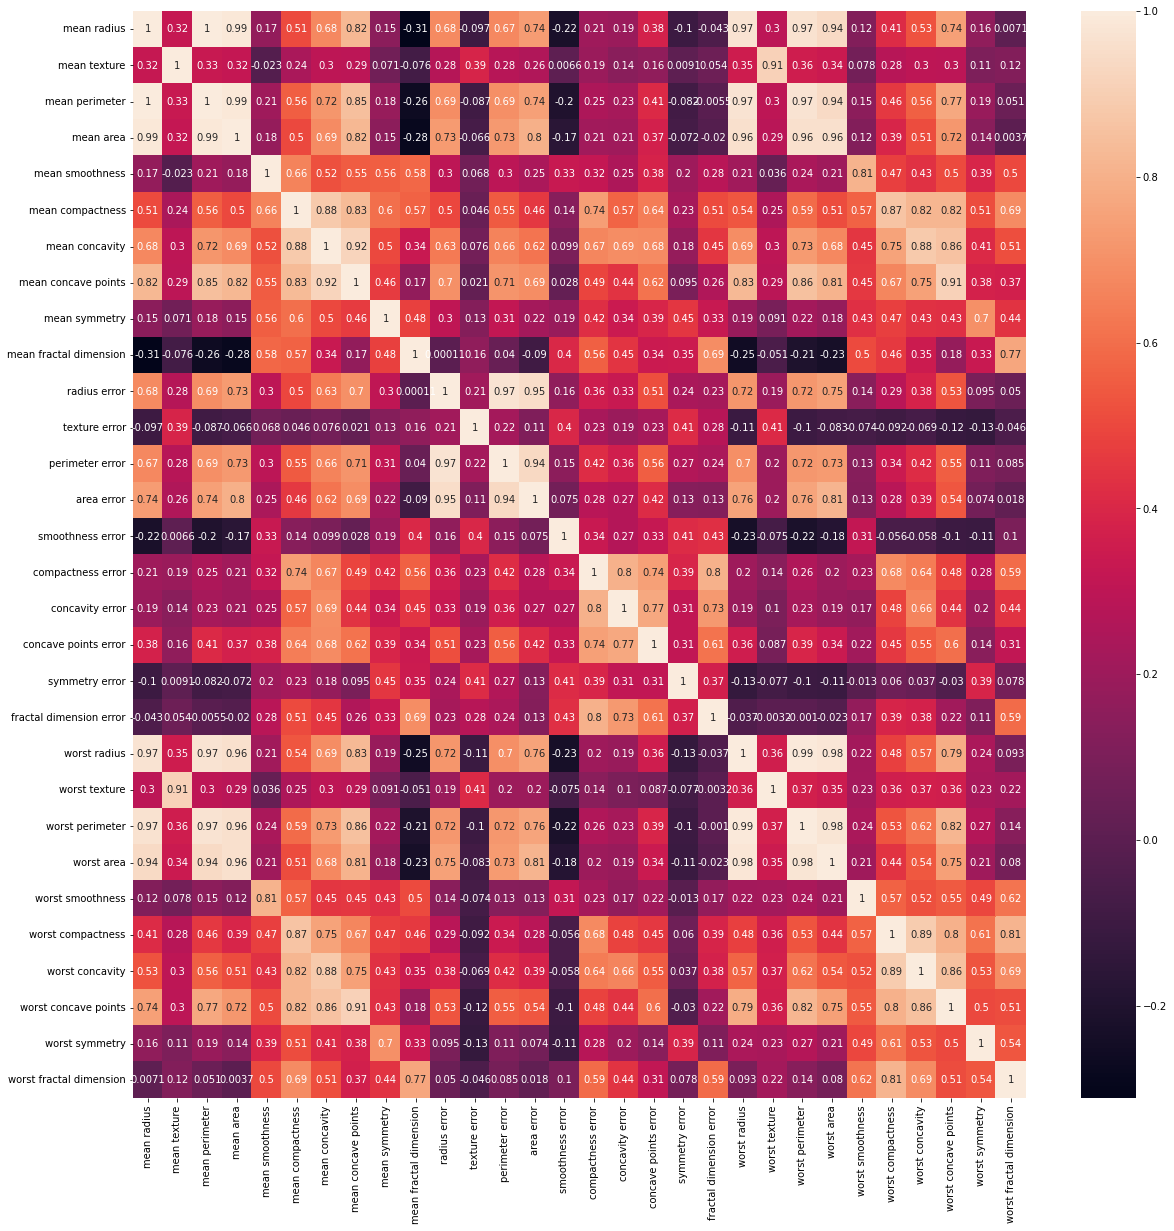

In [ ]:
# We studied possible correlations between variables
fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
# In the previous graph we can verify that there are several variables that present
# a high correlation, let's see how we can rule them out

# We implement a function that creates a list with the columns whose index
# of correlation is less than a certain threshold (thres)
def find_lc_cols(df, thres):
  """
  Find the variables with a correlation greater than the threshold (thres)
  """
  corr = df.corr() 
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if abs(corr.iloc[i,j]) >= thres:
        if columns[j]: columns[j] = False
  
  return columns

# We execute the function and retrieve the columns/variables with low correlation
lc_cols = find_lc_cols(df, thres=0.90)
print("Variable/s with low (<90%) correlation:", df.columns[lc_cols].tolist())

Variable/s with low (<90%) correlation: ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


In [ ]:
# We build a Dataframe that only includes the selected columns 
s_cols = df.columns[lc_cols]
df_s = df[s_cols]
print("Selected variables:", len(df_s.columns))
print("Out of a total of:", len(df.columns))
print("Final dataset:", df_s)

Selected variables: 20
Out of a total of: 30
Final dataset:      mean radius  mean texture  mean smoothness  mean compactness  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean concavity  mean symmetry  mean fractal dimension  radius error  \
0           0.30010         0.2419 

In [ ]:
# After debugging our dataset we can proceed to create the datasets
# training and testing

# We will use the Scikit-learn function to configure the training sets
# and test
from sklearn.model_selection import train_test_split

X = df_s[df_s.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Let's see what is the shape of these arrays
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

 - X_train: (455, 20)
 - X_test: (114, 20)
 - y_train: (455,)
 - y_test: (114,)


## Decision tree


In [ ]:
# It's time to set up our classifier and fit the model to the data
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# Adjusted the model we will evaluate its performance
# Calculate the predictions of the trained model on the test set
y_test_pred = clf_dt.predict(X_test)

# Using the true labels in the test set, we calculate the
# model precision
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_test_pred) * 100
print("The precision of the model is: {:0.2f}".format(acc))  

The precision of the model is: 91.23


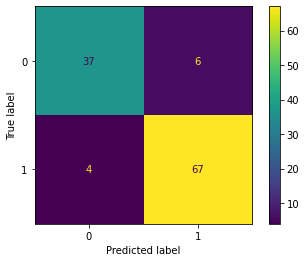

In [ ]:
# Let us now see the confusion matrix to obtain a better evaluation of the
# performance. Remember that in the test set we have 114 subjects
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

The results obtained indicate that our model has a good precision for classification > 91%.

In addition, it manages to correctly identify 37 benign cases and 67 malignant cases, with a total of 6 false positives and 4 false negatives.

## Apply Logistic Regression Model
Let's see how a logistic regression model does.

https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression


In [ ]:
# We simply have to import the appropriate model and apply it to the prepared data
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_test_pred = clf_lr.predict(X_test)

acc = accuracy_score(y_test, y_test_pred) * 100
print("The precision of the model (LogReg) is: {:0.2f}".format(acc))

The precision of the model (LogReg) is: 95.61


## ROC curve

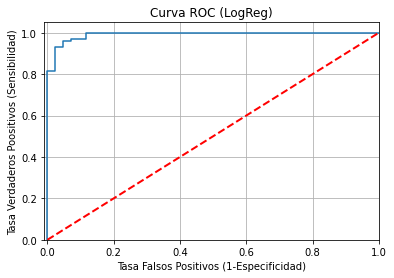

In [ ]:
# We now explore the shape of the ROC curve
from sklearn.metrics import roc_curve

# Calculate the probability values ​​assigned by the model over the set test 
y_score = clf_lr.predict_proba(X_test)

# And we get the rate of false positives and true positives
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

# The ROC curve represents the relationship between both metrics
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC (LogReg)')
plt.xlabel('Tasa Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa Verdaderos Poositivos (Sensibilidad)')
plt.grid(True)